## Librairies Import

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## Data Import

In [ ]:
# Importing Data
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   UDI                      10000 non-null  int64  
 2   Product ID               10000 non-null  object 
 3   Type                     10000 non-null  object 
 4   Air temperature [K]      10000 non-null  float64
 5   Process temperature [K]  10000 non-null  float64
 6   Rotational speed [rpm]   10000 non-null  int64  
 7   Torque [Nm]              10000 non-null  float64
 8   Tool wear [min]          10000 non-null  int64  
 9   Machine failure          10000 non-null  int64  
 10  TWF                      10000 non-null  int64  
 11  HDF                      10000 non-null  int64  
 12  PWF                      10000 non-null  int64  
 13  OSF                      10000 non-null  int64  
 14  RNF                    

In [ ]:
df.describe()

,Unnamed: 0,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4999.50000,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,0.00000,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2499.75000,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4999.50000,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7499.25000,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9999.00000,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


## Data Preprocessing

In [ ]:
#Dropping irrelevant Columns
df.drop(["Unnamed: 0","UDI", "Product ID","RNF","OSF","PWF","HDF","TWF"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


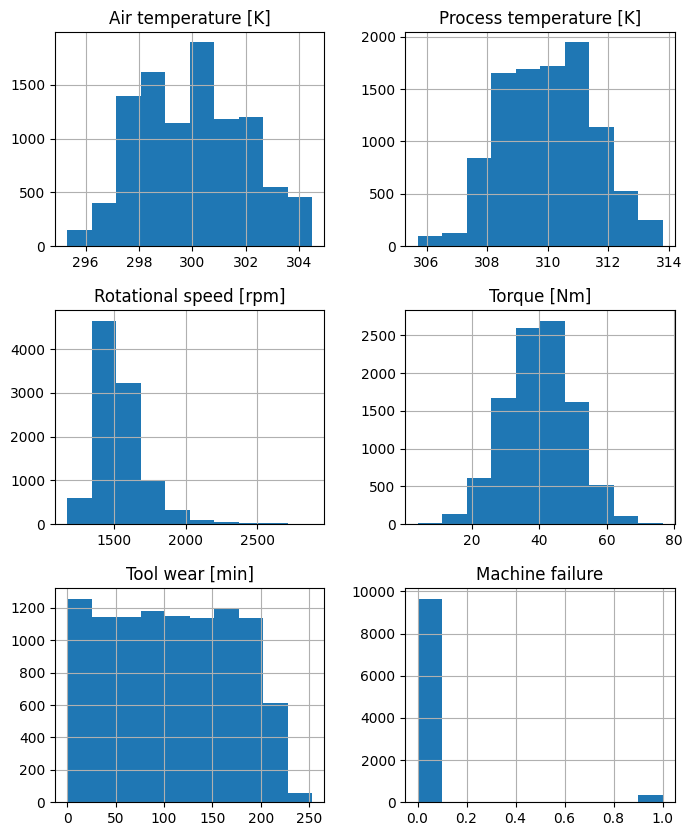

In [ ]:
#Visualizing numerical columns using histograms
df.hist(figsize=(8, 10))
plt.show()

In [ ]:
## Check for duplicated values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [ ]:
# Transform Categorical Values
df = pd.get_dummies(df, columns=['Type'])
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,False,False,True
1,298.2,308.7,1408,46.3,3,0,False,True,False
2,298.1,308.5,1498,49.4,5,0,False,True,False
3,298.2,308.6,1433,39.5,7,0,False,True,False
4,298.2,308.7,1408,40.0,9,0,False,True,False
...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,False,False,True
9996,298.9,308.4,1632,31.8,17,0,True,False,False
9997,299.0,308.6,1645,33.4,22,0,False,False,True
9998,299.0,308.7,1408,48.5,25,0,True,False,False


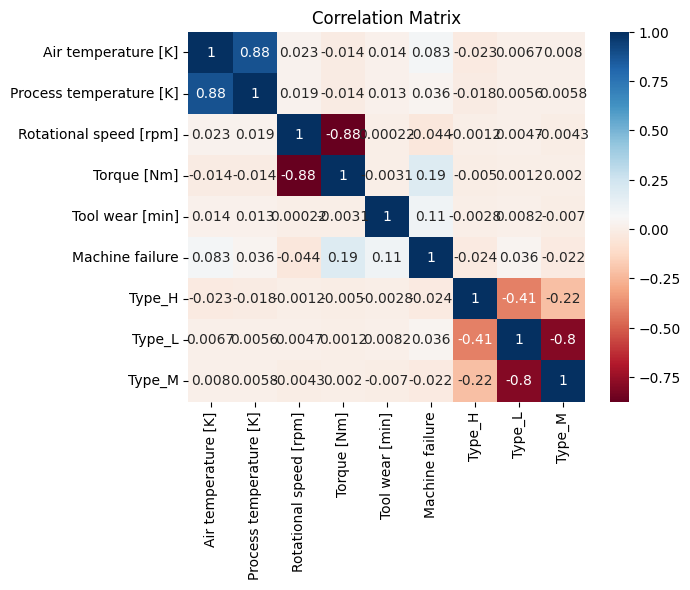

In [ ]:
# Correlation Matrix
sns.heatmap(df.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Normalization
col = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
df[col] = StandardScaler().fit_transform(df[col])
df[col]

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588
...,...,...,...,...,...
9995,-0.602417,-1.082162,0.363820,-1.052012,-1.476034
9996,-0.552421,-1.082162,0.520005,-0.821283,-1.428902
9997,-0.502425,-0.947360,0.592519,-0.660777,-1.350349
9998,-0.502425,-0.879959,-0.729472,0.854005,-1.303217


In [ ]:
# Re-Format columns name
df.columns = df.columns.str.replace('[', '_').str.replace(']', '_').str.replace('<', '_')

In [ ]:
df.to_csv('train.csv')